In [50]:
!pip install -U transformers==4.37.1

  Using cached transformers-4.37.1-py3-none-any.whl.metadata (129 kB)
  Using cached tokenizers-0.15.2-cp310-none-win_amd64.whl.metadata (6.8 kB)
Using cached transformers-4.37.1-py3-none-any.whl (8.4 MB)
Using cached tokenizers-0.15.2-cp310-none-win_amd64.whl (2.2 MB)

  Attempting uninstall: tokenizers

    Found existing installation: tokenizers 0.22.1

    Uninstalling tokenizers-0.22.1:

      Successfully uninstalled tokenizers-0.22.1

  Attempting uninstall: transformers

    Found existing installation: transformers 4.57.1

   -------------------- ------------------- 1/2 [transformers]
   -------------------- ------------------- 1/2 [transformers]
   -------------------- ------------------- 1/2 [transformers]
   -------------------- ------------------- 1/2 [transformers]
   -------------------- ------------------- 1/2 [transformers]
   -------------------- ------------------- 1/2 [transformers]
    Uninstalling transformers-4.57.1:
   -------------------- ------------------- 1/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.37.1 which is incompatible.


Check image-to-text model Uform https://huggingface.co/unum-cloud/uform-gen2-qwen-500m

In [4]:
from transformers import AutoModel
#model = AutoModel.from_pretrained("unum-cloud/uform-gen2-qwen-500m", trust_remote_code=True)

In [5]:
from transformers import AutoModel, AutoProcessor

model = AutoModel.from_pretrained("unum-cloud/uform-gen2-qwen-500m", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("unum-cloud/uform-gen2-qwen-500m", trust_remote_code=True)

Loading checkpoint shards: 100%|██████████| 2/2 [00:10<00:00,  5.01s/it]
c:\Users\greng\ad_search_engine\rus-ad-search-engine\.venv\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
import torch
import matplotlib.pyplot as plt

In [8]:
from PIL import Image
image = Image.open("../data/pictures/1.jpg")

In [9]:
prompt = "List the objects in the photo in one sentence, no information about background needed"

In [10]:
inputs = processor(text=[prompt], images=[image], return_tensors="pt")
with torch.inference_mode():
     output = model.generate(
        **inputs,
        do_sample=False,
        use_cache=True,
        max_new_tokens=256,
        eos_token_id=151645,
        pad_token_id=processor.tokenizer.pad_token_id
        
    )

prompt_len = inputs["input_ids"].shape[1]
decoded_text = processor.batch_decode(output[:, prompt_len:])[0]

In [11]:
print(decoded_text)

A beige coat with two pockets, a buttoned front, and a denim jacket with a pocket and collar are displayed on a gray marble surface.<|im_end|>


In [12]:
image = Image.open("../data/pictures/2.jpg")
prompt = "List the objects in the photo in one sentence, no information about background needed"

In [13]:
inputs = processor(text=[prompt], images=[image], return_tensors="pt")
with torch.inference_mode():
     output = model.generate(
        **inputs,
        do_sample=False,
        use_cache=True,
        max_new_tokens=256,
        eos_token_id=151645,
        pad_token_id=processor.tokenizer.pad_token_id
        
    )

prompt_len = inputs["input_ids"].shape[1]
decoded_text = processor.batch_decode(output[:, prompt_len:])[0]

Three pieces of fabric, one light beige, one blue and white floral, and one green and white floral, are laid out on a marble countertop, with the light beige fabric slightly overlapping the blue and white floral fabric.<|im_end|>


(-0.5, 2559.5, 1919.5, -0.5)

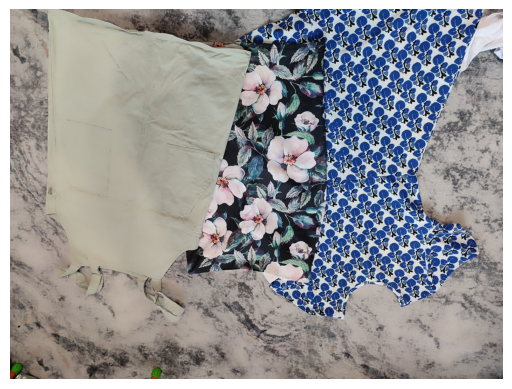

In [14]:
print(decoded_text)
plt.imshow(image)
plt.axis('off')

In [15]:
image = Image.open("../data/pictures/10.jpg")
prompt = "List the objects in the photo in one sentence, no information about background needed"

In [16]:
inputs = processor(text=[prompt], images=[image], return_tensors="pt")
with torch.inference_mode():
     output = model.generate(
        **inputs,
        do_sample=False,
        use_cache=True,
        max_new_tokens=256,
        eos_token_id=151645,
        pad_token_id=processor.tokenizer.pad_token_id
        
    )

prompt_len = inputs["input_ids"].shape[1]
decoded_text = processor.batch_decode(output[:, prompt_len:])[0]

Two dogs, one sitting and one lying down, are in a room with a large window, a light switch, and a door.<|im_end|>


(-0.5, 959.5, 1279.5, -0.5)

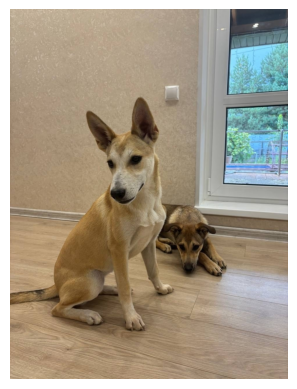

In [17]:
print(decoded_text)
plt.imshow(image)
plt.axis('off')

In [18]:
image = Image.open("../data/pictures/18.jpg")
prompt = "List the objects in the photo in one sentence, no information about background needed"

In [19]:
inputs = processor(text=[prompt], images=[image], return_tensors="pt")
with torch.inference_mode():
     output = model.generate(
        **inputs,
        do_sample=False,
        use_cache=True,
        max_new_tokens=256,
        eos_token_id=151645,
        pad_token_id=processor.tokenizer.pad_token_id

    )

prompt_len = inputs["input_ids"].shape[1]
decoded_text = processor.batch_decode(output[:, prompt_len:])[0]

A white teapot, ceramic pitcher, and basket with glasses are arranged on a windowsill, with a basket of tea and a glass of water nearby.<|im_end|>


(-0.5, 1926.5, 2559.5, -0.5)

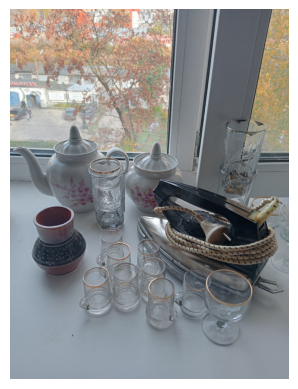

In [20]:
print(decoded_text)
plt.imshow(image)
plt.axis('off')

Let's translate the model output to Russian language

In [1]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-ru")
translator_model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-ru")

c:\Users\greng\ad_search_engine\rus-ad-search-engine\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\greng\ad_search_engine\rus-ad-search-engine\.venv\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\greng\ad_search_engine\rus-ad-search-engine\.venv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\greng\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-en-ru. Caching files will still work but in a degraded version tha

In [21]:
translated_data = []
tokens = tokenizer(decoded_text, return_tensors="pt")
translated_text = translator_model.generate(**tokens)
translated_text = tokenizer.decode(translated_text[0], skip_special_tokens=True)

In [22]:
print(translated_text)

Белый чайник, керамический питчер и корзина с очками расположены на подоконнике с корзиной чая и стаканом воды рядом.


Check the donut model from https://huggingface.co/intexcp/donut The Donut (end-to-end transformer) model for text recognition with support of Russian language



In [48]:
pip install datasets

   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   -------- ------------------------------- 6.3/28.1 MB 32.2 MB/s eta 0:00:01
   ------------------- -------------------- 13.6/28.1 MB 34.3 MB/s eta 0:00:01
   --------------------------- ------------ 19.4/28.1 MB 31.4 MB/s eta 0:00:01
   ---------------------------------- ----- 24.1/28.1 MB 29.9 MB/s eta 0:00:01
   ---------------------------------------- 28.1/28.1 MB 28.8 MB/s  0:00:00

   -------- -------------------------------  2/10 [pyarrow]
   -------- -------------------------------  2/10 [pyarrow]
   -------- -------------------------------  2/10 [pyarrow]
   -------- -------------------------------  2/10 [pyarrow]
   -------- -------------------------------  2/10 [pyarrow]
   -------- -------------------------------  2/10 [pyarrow]
   -------- -------------------------------  2/10 [pyarrow]
   ---------------- -----------------------  4/10 [dill]
   -------------------- -------------------  5/10 [multiproce